# Predicting the Price of Used Cars
The price of used cars will be predicted in this project utilizing a variety of features, including brand, price, mileage, fuel type, year,etc. This project's data was downloaded from Kaggle

# Importing libraries

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

# Loading the dataset

In [39]:
car_data = pd.read_csv("https://raw.githubusercontent.com/abhiisap/final-project-1/main/car_price_data1.csv")

In [40]:
car_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [41]:
car_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [42]:
car_data.shape

(4345, 9)

# Investigating the descriptive statistics of variables

In [43]:
car_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [44]:
# Information of the data
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


# Eliminate features that are not necessary for building our model

In [45]:
#There are 312 different models listed in the Model column, which makes it difficult to construct a regression because it would require more than 300 dummies.
df = car_data.drop(labels='Model', axis=1)


# In the dataset, look for any missing values and deal with them

In [46]:
df.isna().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [47]:
#Simply dropping all nan values is not usually a good idea, but when we delete less than 5% of the data, it is acceptable.
df_no_mv = df.dropna()

# Data Exploration

Text(0.5, 1.0, 'Car Price Distribution Plot')

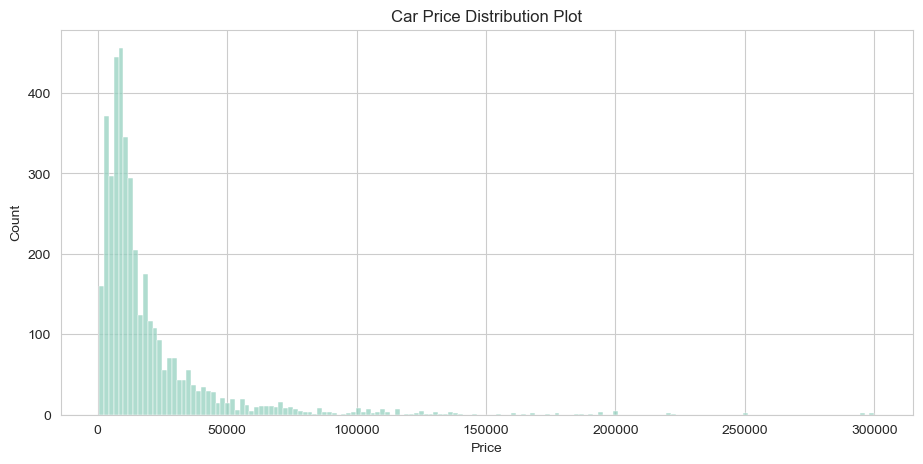

In [48]:
#This makes it very simple to identify abnormalities like outliers.
plt.figure(figsize=[11,5])
sns.histplot(df_no_mv['Price'])
plt.title('Car Price Distribution Plot')

This histogram plot is used to see how automobile prices are distributed. The height of each bar in the plot denotes the frequency or number of cars that fall inside a given price range, and each bar represents a price range.

Text(0.5, 1.0, 'EngineV Distribution Plot')

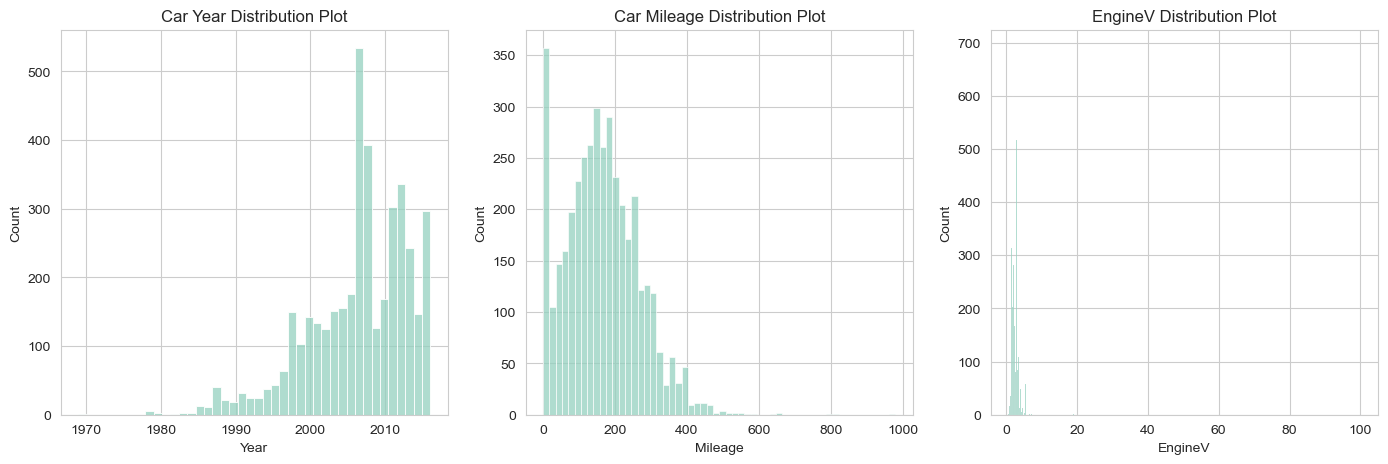

In [49]:
# car and mileage Distribution Plot
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.histplot(df_no_mv['Year'])
plt.title('Car Year Distribution Plot')

plt.subplot(1,3,2)
sns.histplot(df_no_mv['Mileage'])
plt.title('Car Mileage Distribution Plot')

plt.subplot(1,3,3)
sns.histplot(df_no_mv['EngineV'])
plt.title('EngineV Distribution Plot')

These are the series of three distribution charts which is used to display the distribution of three distinct variables in my dataset- car year, car mileage, and engine volume.

# Dealing with outliers

# Price Column

In [50]:
#The right side of the graph shows where the outliers are located here.By deleting 0.5% or 1% of the toublesome samples, the issue can be readily resolved.
#Given that this dataset is about secondhand automobiles, it is easy to see why $300,000 is an inflated price. since outlier are a major problem for OLS, we must find a strategy to deal with them.

#Create a variable whose value will be the 99th percentile of the 'Price' variable.
q = df_no_mv['Price'].quantile(0.99)

#Then, under the costraint that all prices must fall below the 99th percentile of "Price", we can generate a new df.
data_1 = df_no_mv[df_no_mv['Price']<q]

Text(0.5, 1.0, 'Car Price Distribution Plot')

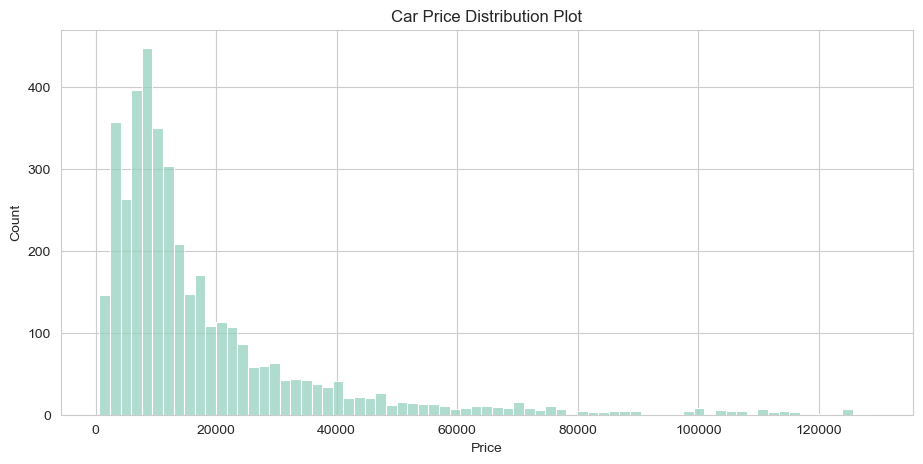

In [51]:

plt.figure(figsize=[11,5])
sns.histplot(data_1['Price'])
plt.title('Car Price Distribution Plot')

After the extreme outliers were eliminated, this histogram now accurately depicts the distribution of car price ranges.

# Mileage Column

Text(0.5, 1.0, 'Car Mileage Distribution Plot')

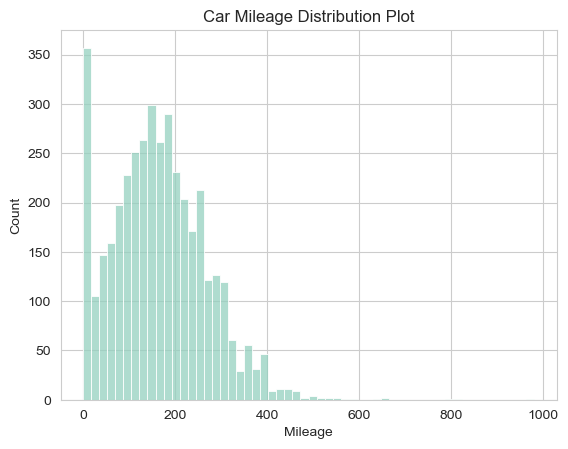

In [52]:
#We can treat the other numerical variables outlier in a same way.
sns.histplot(df_no_mv['Mileage'])
plt.title('Car Mileage Distribution Plot')

In [53]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

<Axes: xlabel='Mileage', ylabel='Count'>

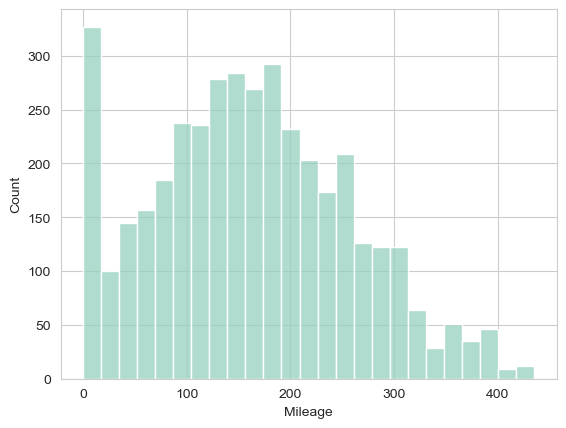

In [54]:

sns.histplot(data_2['Mileage'])

It shows the histogram plot for the 'Mileage' variable in the 'data_2' dataframe 

# Year Column

<Axes: xlabel='Year', ylabel='Count'>

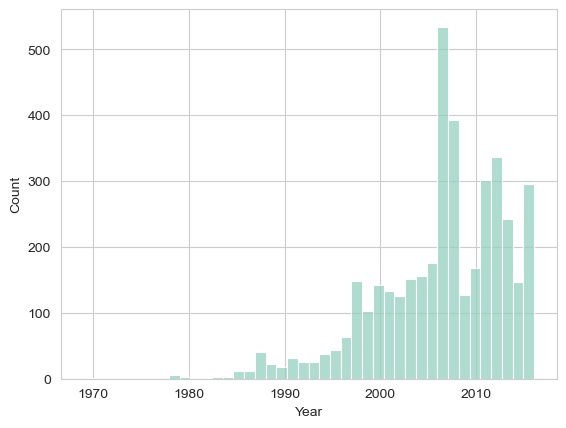

In [55]:
#Outliers in this situation are on the low end.
sns.histplot(df_no_mv['Year'])

In [56]:
q = data_2['Year'].quantile(0.01)
data_3 = data_2[data_2['Year']>q]

<Axes: xlabel='Year', ylabel='Count'>

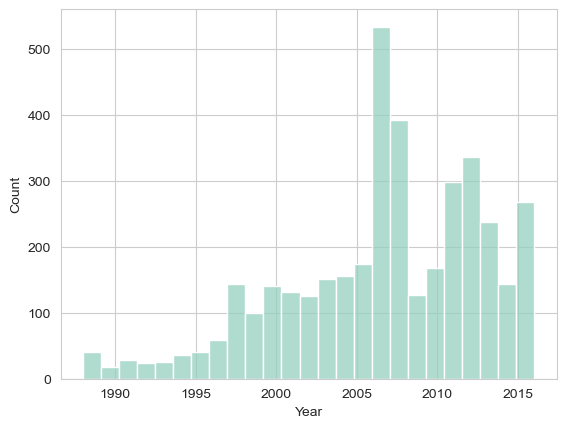

In [57]:
sns.histplot(data_3['Year'])

We can see how the distribution of automobile manufacture years varies before and after deleting the outliers on the low end by making these two histogram graphs

# EngineV Column

Text(0.5, 1.0, 'EngineV Distribution Plot')

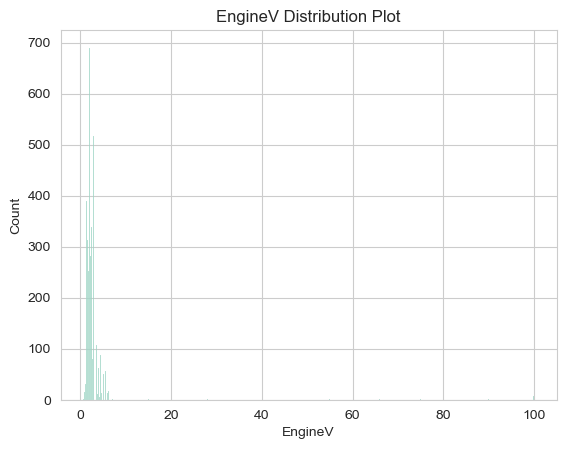

In [58]:
#In such circumstances, it makes sense to manually check what might be the issue. In our case, the issue stems from the fact that the majority of missing numbers are represented with 99.99 or 99.
#There are some false entries as well, such as 75
sns.histplot(df_no_mv['EngineV'])
plt.title('EngineV Distribution Plot')

In [59]:
#Car engine capacities are typically under 6.5litres. this is a perfect illustratio of how a domain expert(someone who works in the automotive sector) may find it much simpler to identify issues with the data than an outsider.
data_4 = data_3[data_3['EngineV']<6.5]

<Axes: xlabel='EngineV', ylabel='Count'>

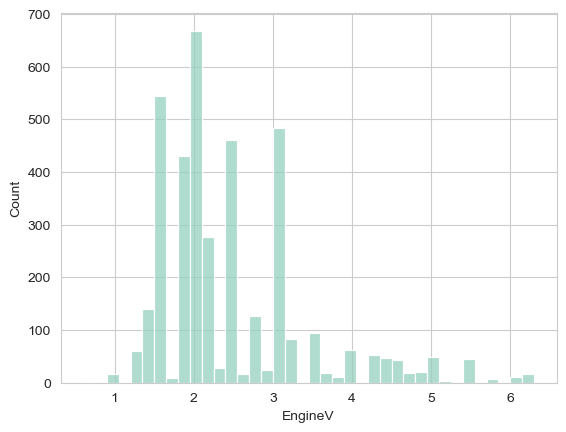

In [60]:
# now its looks kind of normal
sns.histplot(data_4['EngineV'])

In [61]:
# Resetting the  index
cleaned_data = data_4.reset_index(drop=True)

In [62]:
# once again checking discriptive statistics
cleaned_data.describe()

,Price,Mileage,EngineV,Year
count,3867.000000,3867.000000,3867.000000,3867.000000
mean,18194.455679,160.542539,2.450440,2006.709853
std,19085.855165,95.633291,0.949366,6.103870
min,800.000000,0.000000,0.600000,1988.000000
25%,7200.000000,91.000000,1.800000,2003.000000
50%,11700.000000,157.000000,2.200000,2008.000000
75%,21700.000000,225.000000,3.000000,2012.000000
max,129222.000000,435.000000,6.300000,2016.000000


# Let's use a scatter plot to verify the linearity

Text(0.5, 1.0, 'Price and EngineV')

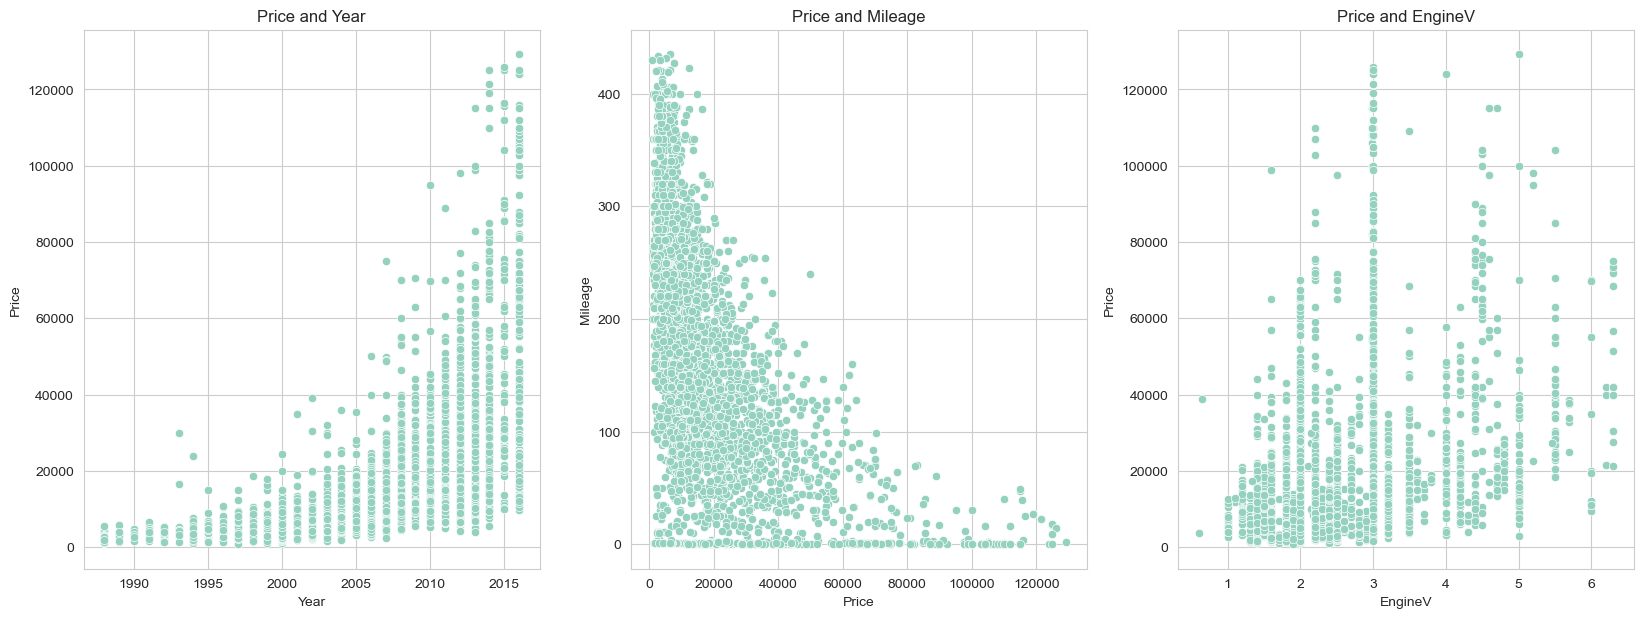

In [63]:
#Scatter Plot of independent variables vs dependent variables
plt.figure(figsize=[20,7])
plt.subplot(1,3,1)
plt.title("Price and Year")
sns.scatterplot(x='Year',y='Price',data=cleaned_data)

plt.subplot(1,3,2)
plt.title("Price and Mileage")
sns.scatterplot(x='Price',y='Mileage',data=cleaned_data)

plt.subplot(1,3,3)
sns.scatterplot(y='Price',x='EngineV',data=cleaned_data)
plt.title("Price and EngineV")

While not always completely linear, patterns are nevertheless discernible to us. We are aware that a linear regression cannot be carried out in this situation. One or more variables initially need to be transformed. Remember that the price distribution plot is leading us to believe that the price is not regularly distributed. Additionally, it does not interact linearly from there with the other features that have a pretty regular distribution.

<Axes: xlabel='Price', ylabel='Count'>

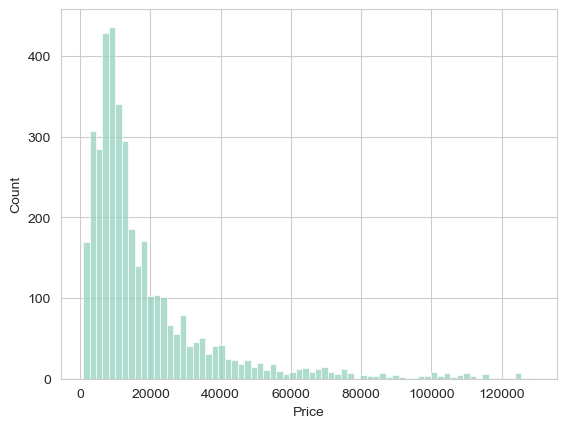

In [64]:
#recall the distribution plot of price
sns.histplot(cleaned_data['Price'])

Here, the condition log transformation's patterns largely follow exponential curves, which is a common solution to this issue. Log transformation is quite useful when working with exponential scatter plots, which is what I am doing right now.

# Transforming 'Price' with a log transformation

In [65]:
# Let's transform 'Price' with a log transformation and add it to our dataframe.
log_price = np.log(cleaned_data['Price'])


cleaned_data['log_price'] = log_price
cleaned_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656


Text(0.5, 1.0, 'Log price and EngineV')

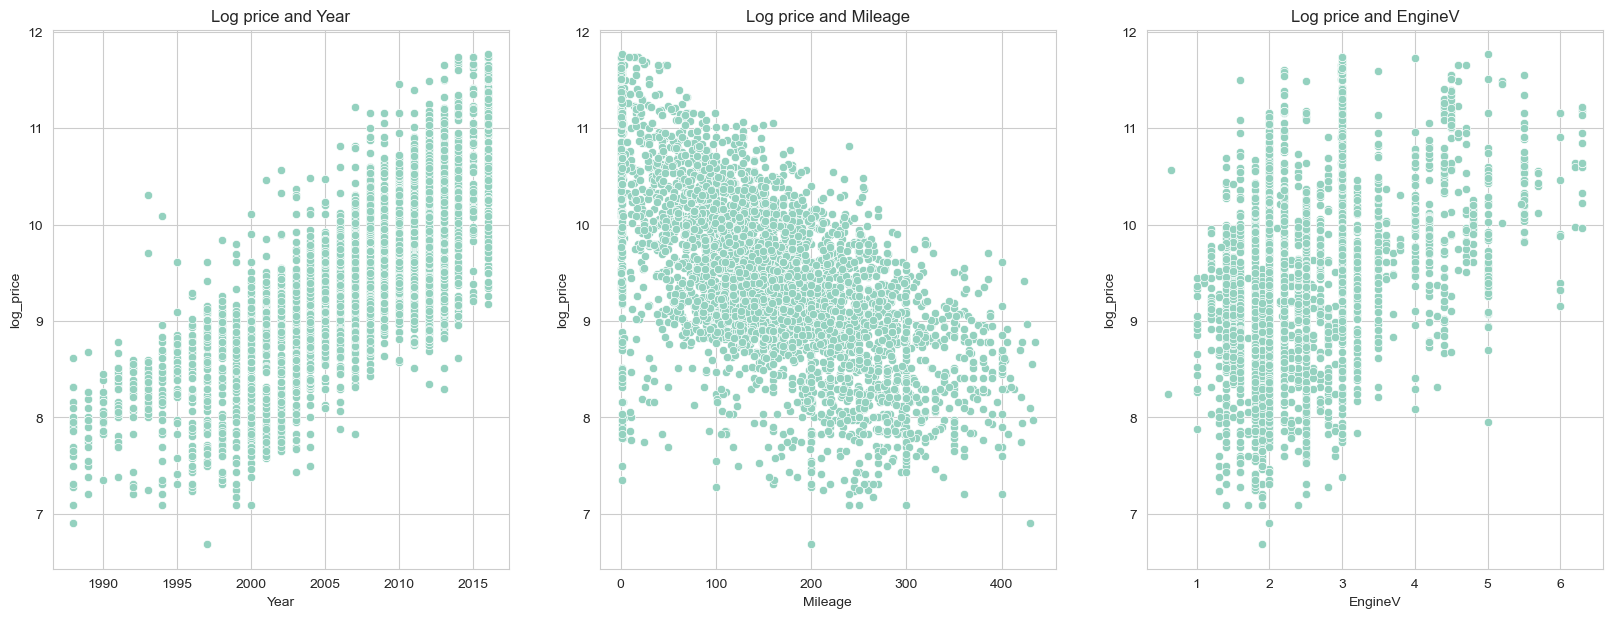

In [66]:
# Let's check the three scatters once again

plt.figure(figsize=[20,7])
plt.subplot(1,3,1)
plt.title("Log price and Year")
sns.scatterplot(x='Year',y='log_price',data=cleaned_data)

plt.subplot(1,3,2)
plt.title("Log price and Mileage")
sns.scatterplot(y='log_price',x='Mileage',data=cleaned_data)

plt.subplot(1,3,3)
sns.scatterplot(y='log_price',x='EngineV',data=cleaned_data)
plt.title("Log price and EngineV")

#There is a distinct linear relationship in the relationships. This is some useful information on linear regression.

In [67]:
#Since I will be using the log price variable, i remove the previous 'Price' one.
cleaned_data = cleaned_data.drop(['Price'],axis=1)

# Checking Multicollinearity using VIF

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = cleaned_data[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
#To make it simpler to investigate the outcome, I like to include names.
vif["Features"] = variables.columns
vif

,VIF,Features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


# Fixing Multicollinearity:

In [69]:

#Even though EngineV appears t have a high VIF as well, that won't be the case after 'Year' is gone because that column has a high VIF

data_no_multicolinearity = cleaned_data.drop('Year',axis=1)

In [70]:
data_no_multicolinearity.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656


# Feature Selection
Speed is raised, feature choice models are simplified, and a variety of unwanted issues caused by having many features are avoided.



In [71]:
from sklearn.preprocessing import LabelEncoder
temp_data = data_no_multicolinearity.copy()
for col in temp_data.columns:
    if temp_data[col].dtypes == 'object':
        encoder = LabelEncoder()
        temp_data[col] = encoder.fit_transform(temp_data[col])
        
# Correated Features with target variable
print('\n--Correated Features with target variable--\n')
print(abs(temp_data.corrwith(temp_data['log_price'])).sort_values(ascending=False)[1:])


--Correated Features with target variable--

Mileage         0.614806
Registration    0.462986
EngineV         0.411935
Body            0.387294
Brand           0.099597
Engine Type     0.014890
dtype: float64


<Axes: >

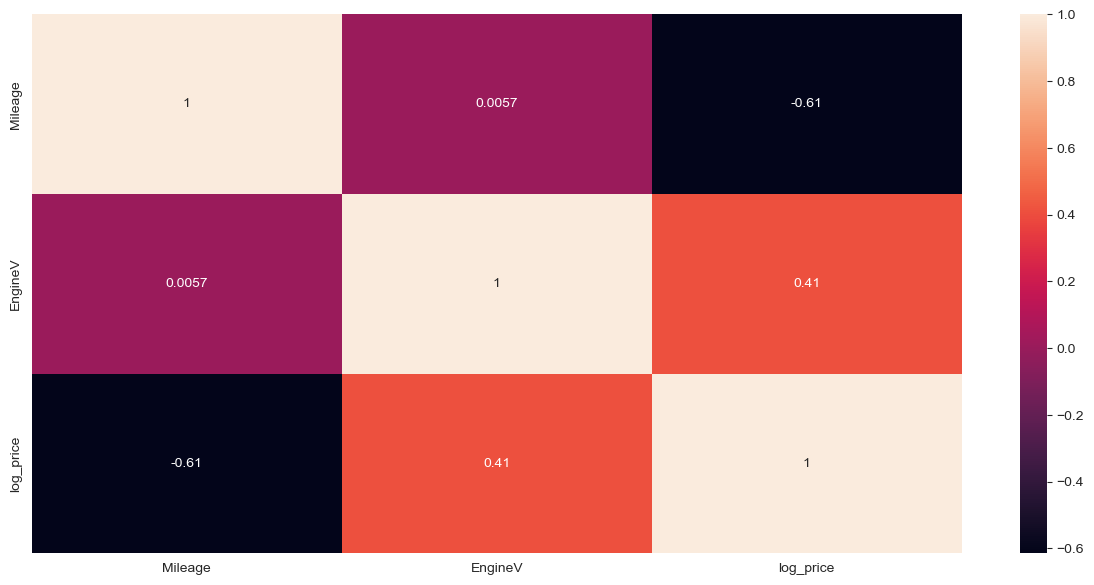

In [72]:
# correlation heat map
plt.figure(figsize=[15,7])
sns.heatmap(data_no_multicolinearity.corr(), annot=True)

According to feature importance, each feature in my data is assigned a score; the higher the score, the more significant or relevant the feature is to our objective variable.

In [73]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
X = temp_data.drop('log_price',axis=1)
y = temp_data['log_price']
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

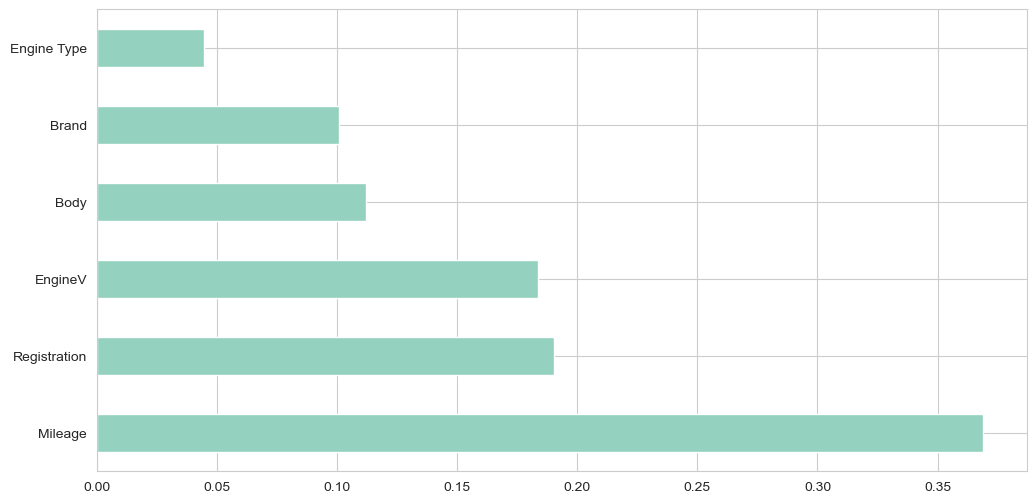

In [74]:
# plot graph of feature importances for better visualization
plt.figure(figsize=[12,6])
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.show()

In [75]:
print(feat_importances.sort_values(ascending=False))

Mileage         0.368741
Registration    0.190304
EngineV         0.183596
Body            0.111925
Brand           0.100796
Engine Type     0.044637
dtype: float64


# Categorical Features

In [76]:
#Creating Dummie Variables
data_with_dummies = pd.get_dummies(data_no_multicolinearity,drop_first=True)

In [77]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


# Model Development
Identifying the dependent and independent variables


In [78]:
x = data_with_dummies.drop('log_price',axis=1)
y = data_with_dummies['log_price']

# Feature Scaling

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x[['Mileage','EngineV']])

StandardScaler()

In [80]:
#Standardizing dummy variables is typically not advised, and for machine learning applications, I typically don't give it any concern because scaling has no impact on their predictive power.
inputs_scaled = scaler.transform(x[['Mileage','EngineV']])
scaled_data = pd.DataFrame(inputs_scaled,columns=['Mileage','EngineV'])

In [81]:
input_scaled2 =scaled_data.join(x.drop(['Mileage','EngineV'],axis=1))

# Training and Testing the Data

In [82]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_scaled2,y,test_size=0.2, random_state=365)

# Linear Regression Model

In [83]:
# Model Building
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Training Model
lr.fit(x_train,y_train)

# Model Summary
y_pred_lr = lr.predict(x_test)

r_squared = r2_score(y_test,y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_lr))
print("R_squared :",r_squared)
print("RMSE :",rmse)

R_squared : 0.7726984972665856
RMSE : 0.42982065395637997


# Random Forest Regressor Model

In [84]:
# Model Building
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

# Training Model
rf.fit(x_train,y_train)

# Model Summary
y_pred_rf = rf.predict(x_test)

r_squared = r2_score(y_test,y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_rf))
print("R_squared :",r_squared)
print("RMSE :",rmse)

R_squared : 0.8128072844560876
RMSE : 0.39005926617254016


# GBT Regressor Model

In [85]:
# Model Building
from sklearn.ensemble import GradientBoostingRegressor
gbt = GradientBoostingRegressor()

# Training Model
gbt.fit(x_train,y_train)

# Model Summary
y_pred_gbt = gbt.predict(x_test)

r_squared = r2_score(y_test,y_pred_gbt)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_gbt))
print("R_squared :",r_squared)
print("RMSE :",rmse)

R_squared : 0.8127216866839528
RMSE : 0.39014843734594074


In [86]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_gbt))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_gbt))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbt)))

MAE: 0.28799288828712016
MSE: 0.15221580316347944
RMSE: 0.39014843734594074


# Selection of the Best Model
Therefore, I tested a number of regression methods and found that "GBT Regressor Model" offered a higher level of accuracy than the others.



In [87]:
#Let's manually verify these predictions to wrap things up.
#We take the exponential of the log_price to get the actual prices.
df_ev = pd.DataFrame(np.exp(y_pred_gbt), columns=['Predicted Price'])

#To compare them manually, i may additionally include the Actual price column in that data frame.
y_test = y_test.reset_index(drop=True)
df_ev['Actual Price'] = np.exp(y_test)

#I can figure out how much the targets and predictions differ from each other.
df_ev['Residual'] = df_ev['Actual Price'] - df_ev['Predicted Price']
df_ev['Difference%'] = np.absolute(df_ev['Residual']/df_ev['Actual Price']*100)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_ev.sort_values(by=['Difference%'])

df_ev.tail(5)

,Predicted Price,Actual Price,Residual,Difference%
769,24080.20,29500.00,5419.80,18.37
770,9552.79,9600.00,47.21,0.49
771,14320.47,18300.00,3979.53,21.75
772,29363.56,68500.00,39136.44,57.13
773,11213.79,10800.00,-413.79,3.83
